In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('IMDb Movies_india.csv')

In [3]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
data.describe()

,Year,Rating
count,188.000000,131.000000
mean,-2004.989362,5.790840
std,18.163838,1.359777
min,-2021.000000,2.400000
25%,-2017.000000,4.850000
50%,-2011.000000,5.700000
75%,-2002.000000,6.900000
max,-1943.000000,8.400000


In [5]:
data.shape

(199, 10)

In [6]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      199 non-null    object 
 1   Year      188 non-null    float64
 2   Duration  131 non-null    object 
 3   Genre     188 non-null    object 
 4   Rating    131 non-null    float64
 5   Votes     131 non-null    object 
 6   Director  197 non-null    object 
 7   Actor 1   181 non-null    object 
 8   Actor 2   174 non-null    object 
 9   Actor 3   162 non-null    object 
dtypes: float64(2), object(8)
memory usage: 15.7+ KB


In [8]:
data.isnull().sum()

Name         0
Year        11
Duration    68
Genre       11
Rating      68
Votes       68
Director     2
Actor 1     18
Actor 2     25
Actor 3     37
dtype: int64

In [9]:
X=data[['Name','Year','Duration','Votes','Genre','Director','Actor 1','Actor 2','Actor 3']]
y=data['Rating']

In [10]:
data.dropna(inplace=True)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Rating'] = scaler.fit_transform(data[['Rating']])
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,0.766667,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",0.333333,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",0.383333,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",0.833333,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",0.533333,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
184,Aabra Ka Daabra,-2004.0,144 min,Fantasy,0.000000,264,Dheeraj Kumar,Naveen Bawa,Prabhu Deva,Satish Kaushik
186,Aabroo,-1968.0,170 min,"Comedy, Crime, Drama",0.516667,21,C.L. Rawal,Ashok Kumar,Vimi,Rehman
192,Aadamkhor,-2018.0,72 min,Horror,0.833333,150,Kshitij Sharma,Deeya Dey,Anoma Pabuwal,Mahendra Singh Rawat
197,Aadat Se Majboor,-1982.0,105 min,"Action, Crime, Drama",0.516667,28,Ambrish Sangal,Mithun Chakraborty,Rameshwari,Madan Puri


In [12]:
X

,Name,Year,Duration,Votes,Genre,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,NaN,Drama,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,8,Drama,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,NaN,"Drama, Musical",Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,35,"Comedy, Romance",Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,NaN,Drama,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...
194,Aadarniy Pitaji,-2020.0,NaN,NaN,Family,Prashant Kumar,NaN,NaN,NaN
195,Aadarsh,-1983.0,NaN,NaN,Drama,NaN,NaN,NaN,NaN
196,Aadat,-1989.0,NaN,NaN,NaN,Dev Malhotra,Madhuri Mishra,Ashok Pandey,Reema Raj
197,Aadat Se Majboor,-1982.0,105 min,28,"Action, Crime, Drama",Ambrish Sangal,Mithun Chakraborty,Rameshwari,Madan Puri


In [13]:
y

0      NaN
1      7.0
2      NaN
3      4.4
4      NaN
      ... 
194    NaN
195    NaN
196    NaN
197    5.5
198    5.1
Name: Rating, Length: 199, dtype: float64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [15]:
X_train

,Name,Year,Duration,Votes,Genre,Director,Actor 1,Actor 2,Actor 3
183,Aaag Hi Aag,-1999.0,NaN,28,Action,T.L.V. Prasad,Mithun Chakraborty,Jackie Shroff,Sneha
38,1920,-2008.0,138 min,"3,100","Horror, Mystery, Romance",Vikram Bhatt,Rajniesh Duggall,Adah Sharma,Anjori Alagh
24,124a,-2021.0,NaN,NaN,Documentary,Varrun Sukhraj,NaN,NaN,NaN
142,A Daughter's Tale PANKH,-2017.0,145 min,10,Drama,Premraaj,Rajinder Verma,Sunil Lahri,Nishigandha Wad
141,A Daughter's Dream,-2014.0,NaN,NaN,"Drama, Family, Sport",Manto Pashupatinath,Bhavana Singh Chauhan,Akhilendra Mishra,Abhilash Narain
...,...,...,...,...,...,...,...,...,...
106,6.40 PM,-1967.0,NaN,5,NaN,Mani Kaul,NaN,NaN,NaN
14,101 Ratein,-1990.0,NaN,NaN,Thriller,Harish,Saraswati,Disco Shanti,NaN
92,3rd November,-2016.0,NaN,NaN,Horror,Vasant Narkar,Minakshi Bhagat,Pragya Chahar,Kabir Khan
179,Aa Gale Lag Jaa,-1973.0,148 min,348,"Action, Drama, Romance",Manmohan Desai,Shashi Kapoor,Sharmila Tagore,Shatrughan Sinha


In [16]:
y_train

183    4.9
38     6.4
24     NaN
142    6.3
141    NaN
      ... 
106    5.4
14     NaN
92     NaN
179    7.2
102    NaN
Name: Rating, Length: 159, dtype: float64

In [17]:
X_test

,Name,Year,Duration,Votes,Genre,Director,Actor 1,Actor 2,Actor 3
82,31st October,-2015.0,109 min,238,"Action, Drama, History",Shivaji Lotan Patil,Soha Ali Khan,Lakha Lakhwinder Singh,Nagesh Bhonsle
15,102 Not Out,-2018.0,102 min,"6,619","Comedy, Drama",Umesh Shukla,Amitabh Bachchan,Rishi Kapoor,Vijay Raaz
111,69 Opposites Attract,-2011.0,96 min,NaN,Comedy,Amit r Agarwal,Amit r Agarwal,Kiran Kaur,NaN
177,Aa Bhi Ja O Piya,-2021.0,140 min,NaN,"Family, Romance",Rajesh Harivansh Mishra,Abhijeet Lahiri,Akanksha Sinha,Mukul Nag
76,3 Nights 4 Days,-2009.0,NaN,23,"Drama, Romance",Devang Dholakia,Sameer Aftab,Hrishitaa Bhatt,Anuj Sahani
163,A Small Family,-1976.0,NaN,NaN,Documentary,Fali Bilimoria,NaN,NaN,NaN
68,26th July at Barista,-2008.0,NaN,32,Drama,Mohan Sharma,Ajita,Himani Chawla,Sumeet Chawla
67,26th January,-1956.0,NaN,NaN,Drama,Ramesh Saigal,Ajit,Nalini Jaywant,Leela Mishra
120,706,-2019.0,120 min,449,Thriller,Shravankumar Tiwari,Mohan Agashe,Raayo S. Bakhirta,Divya Dutta
173,A Wednesday,-2008.0,104 min,"75,118","Action, Crime, Drama",Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill


In [18]:
y_test

82     5.8
15     7.4
111    NaN
177    NaN
76     5.2
163    NaN
68     3.1
67     NaN
120    5.3
173    8.1
176    8.0
148    3.0
65     7.6
30     7.1
86     6.7
85     7.5
55     3.5
60     6.1
90     3.6
159    6.8
16     NaN
124    NaN
96     3.9
172    NaN
66     6.6
189    5.2
147    4.5
9      4.0
18     6.3
128    4.7
190    NaN
45     5.5
192    7.4
164    NaN
101    NaN
69     6.9
126    6.6
123    NaN
75     8.4
78     6.9
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Movie Ratings')

<Figure size 1700x800 with 0 Axes>

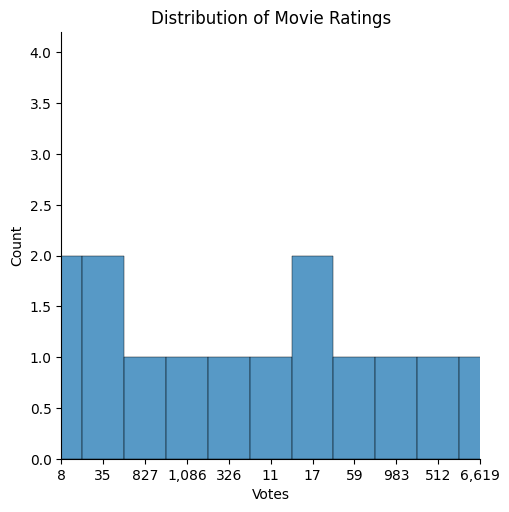

In [19]:
plt.figure(figsize=(17,8))
ax=sn.displot(data['Votes'],bins=9,kde_kws={"bw":0.25})
ax.set(xlim=(0,10))
plt.title("Distribution of Movie Ratings")

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

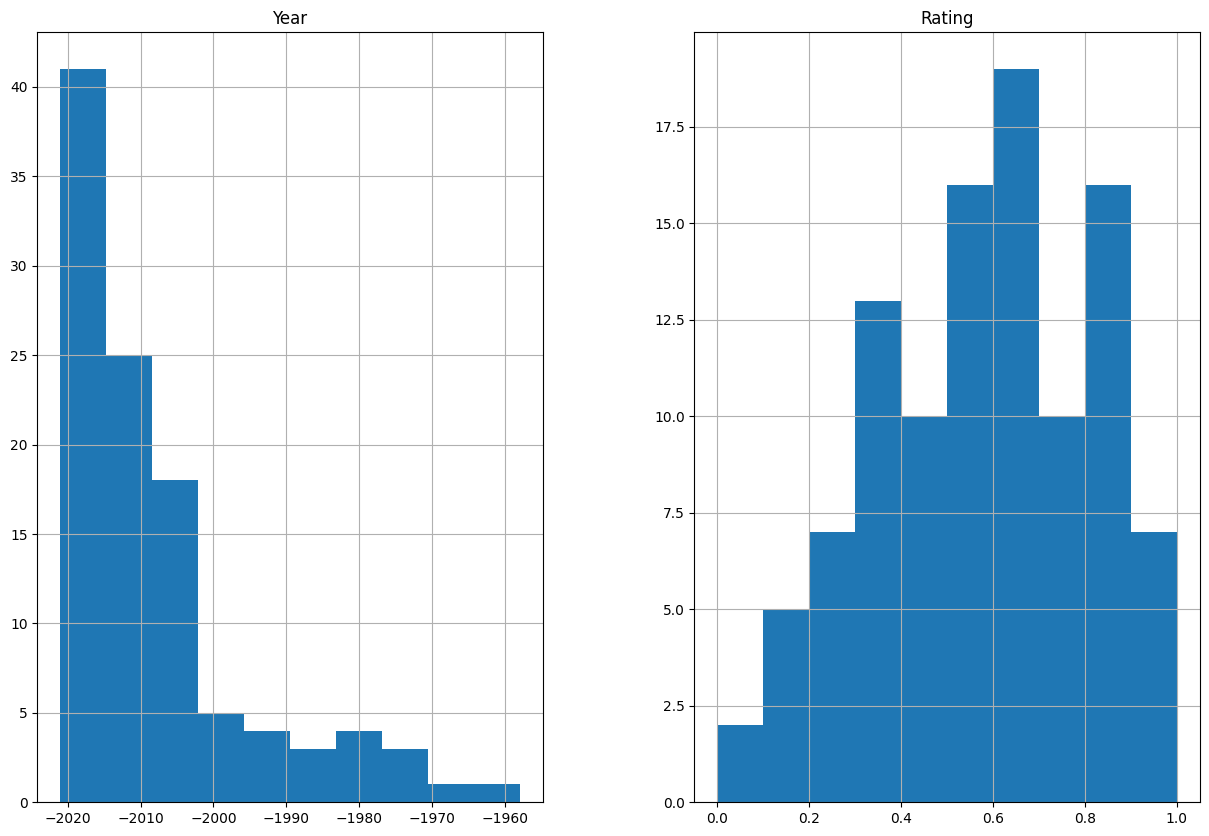

In [20]:

data.hist(figsize=(15,10))

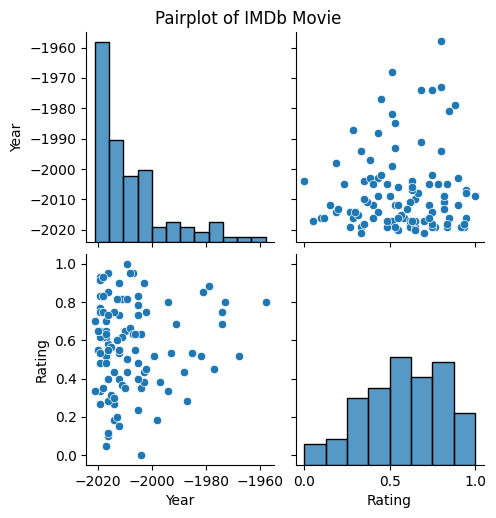

In [21]:
sn.pairplot(data,markers='o')
plt.suptitle('Pairplot of IMDb Movie',y=1.02)
plt.show()

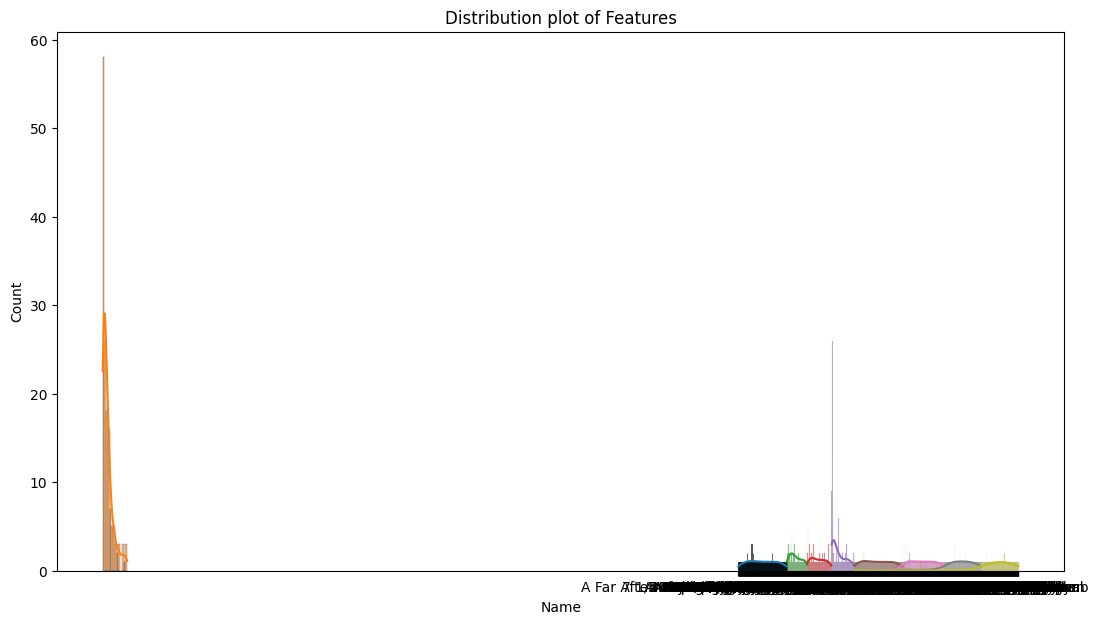

In [22]:
plt.figure(figsize=(13,7))
for i in X_train.columns:
    sn.histplot(X_train[i],kde=True)
plt.title('Distribution plot of Features')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
randregressor=RandomForestRegressor(n_estimators=50)

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [25]:
# Extract features from existing data
data['Num_Actors'] = data['Actor 1'].apply(lambda x: len(x.split(',')))
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Num_Actors
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,0.766667,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,1
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",0.333333,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",0.383333,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",0.833333,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,1
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",0.533333,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,1
...,...,...,...,...,...,...,...,...,...,...,...
184,Aabra Ka Daabra,-2004.0,144 min,Fantasy,0.000000,264,Dheeraj Kumar,Naveen Bawa,Prabhu Deva,Satish Kaushik,1
186,Aabroo,-1968.0,170 min,"Comedy, Crime, Drama",0.516667,21,C.L. Rawal,Ashok Kumar,Vimi,Rehman,1
192,Aadamkhor,-2018.0,72 min,Horror,0.833333,150,Kshitij Sharma,Deeya Dey,Anoma Pabuwal,Mahendra Singh Rawat,1
197,Aadat Se Majboor,-1982.0,105 min,"Action, Crime, Drama",0.516667,28,Ambrish Sangal,Mithun Chakraborty,Rameshwari,Madan Puri,1
